# Introduction to Convoluntional Nueral Network and Computer Vision using Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Getting the data ready

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-05-18 21:59:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 108.177.120.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   114MB/s    in 0.9s    

2024-05-18 21:59:12 (114 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
#unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

In [4]:
!ls pizza_steak

test  train


In [5]:
# !ls pizza_steak/train/pizza

In [6]:
import os

#walk through pizza_steak directory and list number of files

for dir_path, dir_names, file_names in os.walk("pizza_steak"):
  print(f"There are {len(dir_names)} directories and {len(file_names)} files in {dir_path}")

There are 2 directories and 0 files in pizza_steak
There are 2 directories and 0 files in pizza_steak/test
There are 0 directories and 250 files in pizza_steak/test/steak
There are 0 directories and 250 files in pizza_steak/test/pizza
There are 2 directories and 0 files in pizza_steak/train
There are 0 directories and 750 files in pizza_steak/train/steak
There are 0 directories and 750 files in pizza_steak/train/pizza


In [7]:
# Another way to get number of files

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

### Visualize images

In [8]:
#Get the class names programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
#Visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #set up target directory
  target_folder = target_dir + target_class
  #get ONE random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  #read the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  #print image shape
  print(f"Image shape {img.shape}")
  return img

Image shape (512, 512, 3)


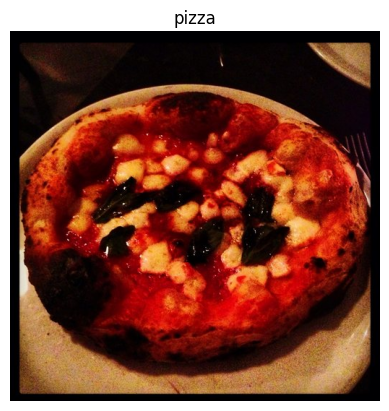

In [10]:
img = view_random_image("pizza_steak/train/", "pizza")

Image shape (512, 512, 3)


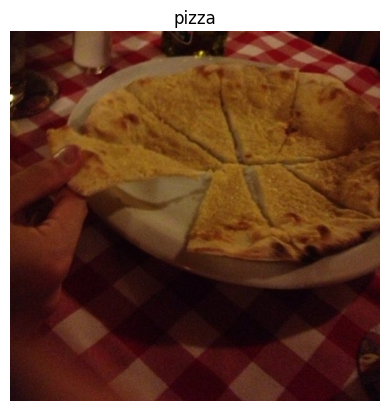

In [11]:
#note the shape is different!
img = view_random_image("pizza_steak/train/", "pizza")

In [12]:
#img is converted to array of numbers by mpimg
img, img.dtype

(array([[[25, 10, 15],
         [24,  9, 14],
         [23,  8, 13],
         ...,
         [39,  8,  5],
         [44, 10,  8],
         [46, 12, 10]],
 
        [[27, 12, 17],
         [25, 10, 15],
         [24,  9, 14],
         ...,
         [41, 10,  7],
         [43,  9,  7],
         [44, 10,  8]],
 
        [[30, 15, 18],
         [28, 13, 16],
         [25, 10, 13],
         ...,
         [42, 13,  9],
         [40,  9,  6],
         [39,  8,  5]],
 
        ...,
 
        [[30, 11, 13],
         [29, 10, 12],
         [29, 10, 12],
         ...,
         [13,  6, 13],
         [15,  5, 13],
         [15,  5, 13]],
 
        [[30, 11, 13],
         [29, 10, 12],
         [29, 10, 12],
         ...,
         [10,  3, 10],
         [12,  5, 12],
         [13,  6, 13]],
 
        [[29, 10, 12],
         [29, 10, 12],
         [29, 10, 12],
         ...,
         [ 7,  0,  7],
         [10,  3, 10],
         [12,  5, 12]]], dtype=uint8),
 dtype('uint8'))

In [13]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[25, 10, 15],
        [24,  9, 14],
        [23,  8, 13],
        ...,
        [39,  8,  5],
        [44, 10,  8],
        [46, 12, 10]],

       [[27, 12, 17],
        [25, 10, 15],
        [24,  9, 14],
        ...,
        [41, 10,  7],
        [43,  9,  7],
        [44, 10,  8]],

       [[30, 15, 18],
        [28, 13, 16],
        [25, 10, 13],
        ...,
        [42, 13,  9],
        [40,  9,  6],
        [39,  8,  5]],

       ...,

       [[30, 11, 13],
        [29, 10, 12],
        [29, 10, 12],
        ...,
        [13,  6, 13],
        [15,  5, 13],
        [15,  5, 13]],

       [[30, 11, 13],
        [29, 10, 12],
        [29, 10, 12],
        ...,
        [10,  3, 10],
        [12,  5, 12],
        [13,  6, 13]],

       [[29, 10, 12],
        [29, 10, 12],
        [29, 10, 12],
        ...,
        [ 7,  0,  7],
        [10,  3, 10],
        [12,  5, 12]]], dtype=uint8)>

In [14]:
#view the image

img.shape #returns width, height, color channels

(512, 512, 3)

### Preprocessing ONE image

In [15]:
#Get all pixel values between 0-1
img/255. #min=0, max=1


array([[[0.09803922, 0.03921569, 0.05882353],
        [0.09411765, 0.03529412, 0.05490196],
        [0.09019608, 0.03137255, 0.05098039],
        ...,
        [0.15294118, 0.03137255, 0.01960784],
        [0.17254902, 0.03921569, 0.03137255],
        [0.18039216, 0.04705882, 0.03921569]],

       [[0.10588235, 0.04705882, 0.06666667],
        [0.09803922, 0.03921569, 0.05882353],
        [0.09411765, 0.03529412, 0.05490196],
        ...,
        [0.16078431, 0.03921569, 0.02745098],
        [0.16862745, 0.03529412, 0.02745098],
        [0.17254902, 0.03921569, 0.03137255]],

       [[0.11764706, 0.05882353, 0.07058824],
        [0.10980392, 0.05098039, 0.0627451 ],
        [0.09803922, 0.03921569, 0.05098039],
        ...,
        [0.16470588, 0.05098039, 0.03529412],
        [0.15686275, 0.03529412, 0.02352941],
        [0.15294118, 0.03137255, 0.01960784]],

       ...,

       [[0.11764706, 0.04313725, 0.05098039],
        [0.11372549, 0.03921569, 0.04705882],
        [0.11372549, 0

## Build an end-to-end CNN model

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data(get all pixel values between 0-1 [Scaling/Normalization])

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set path to data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

#build a cnn model (tiny-VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 194ms/step - loss: 0.5435 - accuracy: 0.7320 - val_loss: 0.4403 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.4488 - accuracy: 0.8020 - val_loss: 0.3918 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4262 - accuracy: 0.8080 - val_loss: 0.3721 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3883 - accuracy: 0.8360 - val_loss: 0.3706 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3303 - accuracy: 0.8667 - val_loss: 0.4539 - val_accuracy: 0.8140


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

https://poloclub.github.io/cnn-explainer/

## Comparing fully-connected model to CNN models

In [18]:
tf.random.set_seed(42)

#tensorflow playground model

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

#model_2 gives coin-toss accuracy! :(

Epoch 1/5
47/47 [==============================] - 8s 144ms/step - loss: 1.4649 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 154ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
model_2.summary() ####LOOK AT NUMBER OF PARAMS

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
tf.random.set_seed(42)

#tensorflow playground model

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 205ms/step - loss: 3.7331 - accuracy: 0.6493 - val_loss: 0.9131 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 13s 287ms/step - loss: 0.8792 - accuracy: 0.7247 - val_loss: 1.6144 - val_accuracy: 0.5960
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.8080 - accuracy: 0.7313 - val_loss: 1.9681 - val_accuracy: 0.5500
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.9264 - accuracy: 0.6987 - val_loss: 0.5093 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.5719 - accuracy: 0.7667 - val_loss: 0.5599 - val_accuracy: 0.7420


In [21]:
model_3.summary() #500 times more params than CNN model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Breaking it down: Binary classification

1. become one with data (visualize)
2. preprocess the data (including scaling, turning data into batches)
3. craete a model (start with a baseline - paper/benchmark model)
4. fit the model
5. evaluate the model
6. adjust params and imporve the model (try to beat the baseline)
7. repeat until satisfied

### become one with the data

Image shape (384, 512, 3)
Image shape (512, 512, 3)


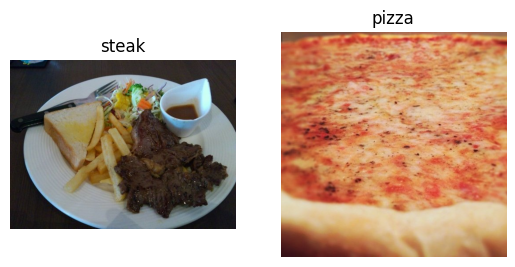

In [22]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. preprocess the data

In [23]:
# define directory dataset paths

train_dir ="/content/pizza_steak/train"
test_dir ="/content/pizza_steak/test"

In [24]:
# turn data into batches (small subsets of data)
# why? all images might not fit into the memory of our processor (GPU)
# trying to learn the patterns in all images at the same time in one hit could
# result in the model not being able to learn patterns very well

#why 32 batch size?

#create train and test datagenerators and rescale tehe data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



In [25]:
# load image data from directories and turn them inro batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

test_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [27]:
len(train_data) #1500/32

47

In [28]:
1500/32

46.875

In [29]:
# get the first 2 images
images[0].shape, images[:2]

((224, 224, 3),
 array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
  

In [30]:
# view the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a ML experiment, and then as you keep experimenting you try to beat the baseline.

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [32]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224,224,3)), #input layer
    Conv2D(10,3, activation="relu"), #kernel_size = 3 === kernel_size = (3,3)
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (workinh with binary classification, so only 1 neuron)
])

#padding = "valid" output shape compressed, "same" output shape is same as input shape
#filter = number of sliding windows going over the input
#kernel= size of each sliding window

In [33]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model


In [35]:
# check lengths of train, test data
len(train_data), len(test_data)

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 249ms/step - loss: 1.5438 - accuracy: 0.6613 - val_loss: 0.4316 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4151 - accuracy: 0.8120 - val_loss: 0.4276 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.2663 - accuracy: 0.9060 - val_loss: 0.3340 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 7s 152ms/step - loss: 0.1317 - accuracy: 0.9580 - val_loss: 0.4905 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.0581 - accuracy: 0.9860 - val_loss: 0.4345 - val_accuracy: 0.8400


### 5. Evaluating model

In [36]:
import pandas as pd

<Axes: >

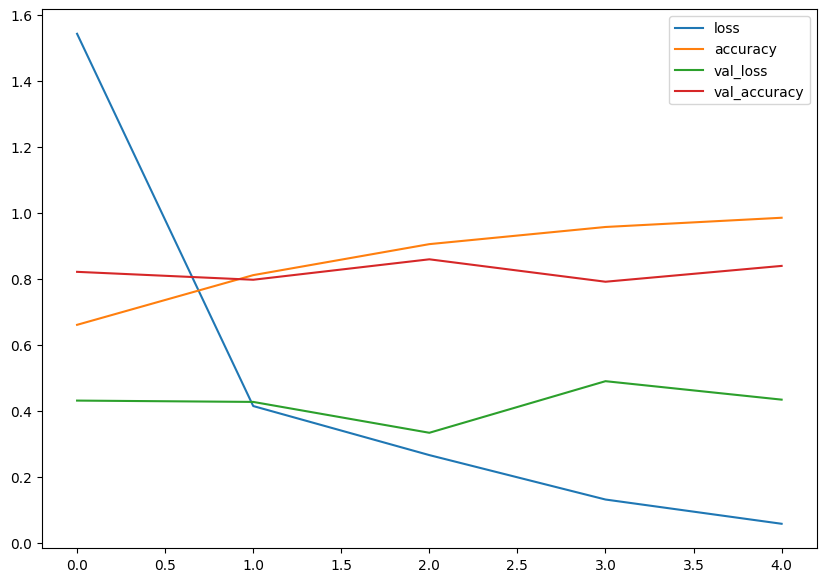

In [37]:
#plotting the training curves
pd.DataFrame(history_4.history).plot(figsize=(10,7))


In [38]:
# plot the validation and training curves seperately (can also use tensorboard callback in fit function)
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  #plt loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plt accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_acc")
  plt.plot(epochs, val_accuracy, label="val_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


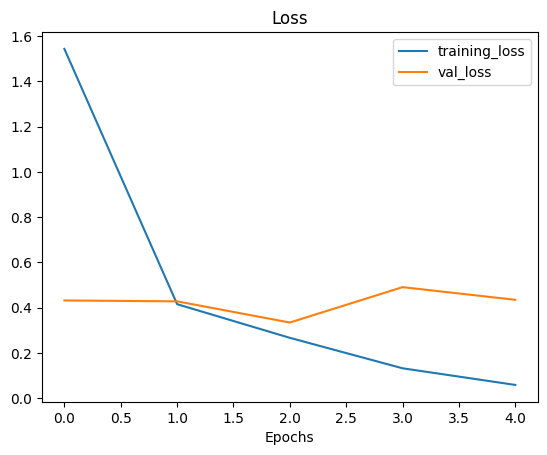

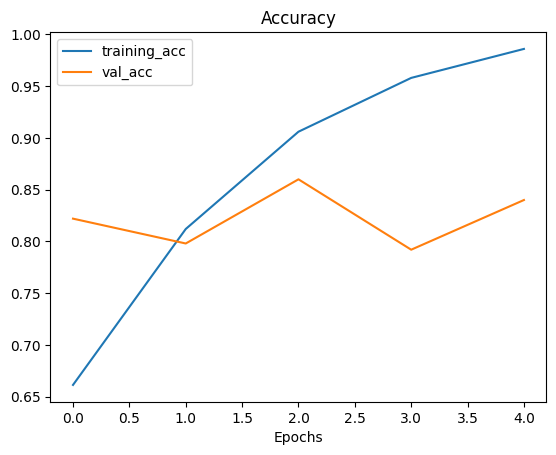

In [39]:
plot_loss_curves(history_4)

when a validation loss increases, overfitting the training dataset. This means its learning the patterns in training data TOO well, thus, model's ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

How to prevent overfitting? data augmentation, add regularization layers (maxPool2D), add more data

In [40]:
model_5 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [41]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 12s 183ms/step - loss: 0.6065 - accuracy: 0.6707 - val_loss: 0.4544 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 7s 149ms/step - loss: 0.4368 - accuracy: 0.8027 - val_loss: 0.3893 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4015 - accuracy: 0.8320 - val_loss: 0.3530 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3775 - accuracy: 0.8300 - val_loss: 0.3276 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3715 - accuracy: 0.8347 - val_loss: 0.3488 - val_accuracy: 0.8640


In [42]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [43]:
model_4.summary() #check out difference in number of params

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


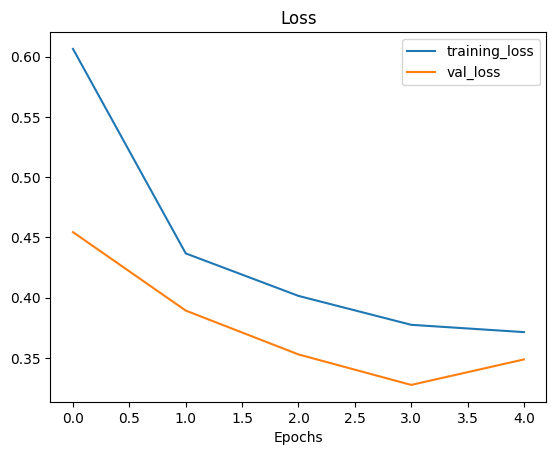

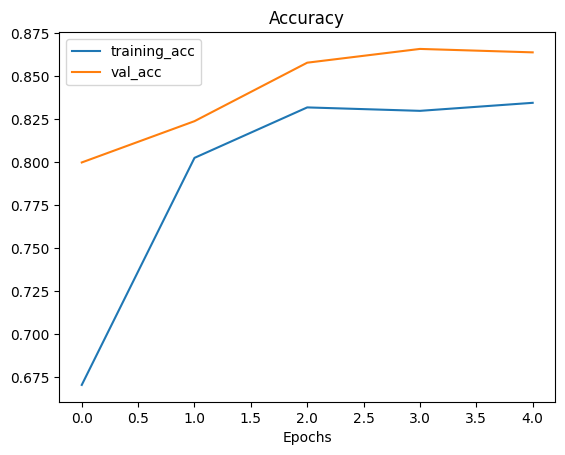

In [44]:
plot_loss_curves(history_5)

### Dta augmentation

In [46]:
#create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True
                                             )
# create ImageDataGenerator without data aug

train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data aug for test
test_datagen = ImageDataGenerator(rescale=1/255.)


In [50]:
##visualising Data augmentation
train_data_aug = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                             target_size =(224,224),
                                                             batch_size=32,
                                                             class_mode="binary",
                                                             shuffle=False #for demo
                                                             )
#create non-aug data batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                             target_size =(224,224),
                                                             batch_size=32,
                                                             class_mode="binary",
                                                             shuffle=False #for demo
                                                             )

#create non-aug test data batches
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                             target_size =(224,224),
                                                             batch_size=32,
                                                             class_mode="binary"
                                                             )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [51]:
#visualizing data
#get sample data batches
images, labels = train_data.next()
aug_images, aug_labels = train_data_aug.next()

(-0.5, 223.5, 223.5, -0.5)

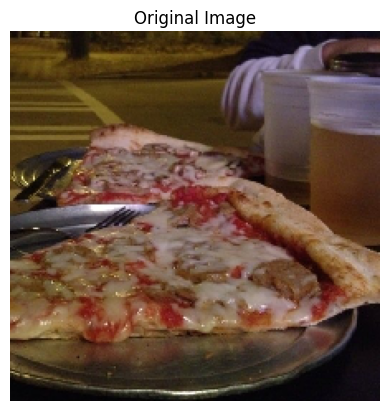

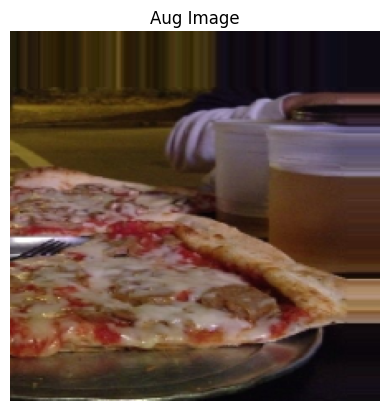

In [65]:
#show orig and augmented imahe
import random
random_num = random.randint(0,32)
plt.imshow(images[random_num])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_num])
plt.title("Aug Image")
plt.axis(False)


In [68]:
## training model with augmented data
model_6 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data = test_data,
                        validation_steps = len(test_data))


#this model is slowwww because data is augmented on the fly!
#another thing- results are not so good as model 5

Epoch 1/5
47/47 [==============================] - 22s 427ms/step - loss: 0.7307 - accuracy: 0.4993 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6901 - accuracy: 0.5267 - val_loss: 0.6578 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6838 - accuracy: 0.6247 - val_loss: 0.6469 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6644 - accuracy: 0.6260 - val_loss: 0.6350 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 21s 440ms/step - loss: 0.6819 - accuracy: 0.5527 - val_loss: 0.5968 - val_accuracy: 0.6140


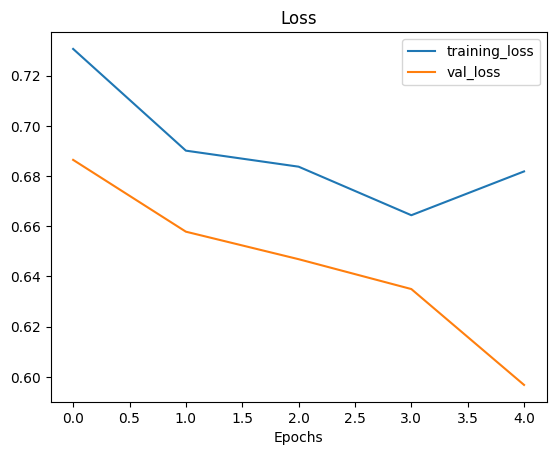

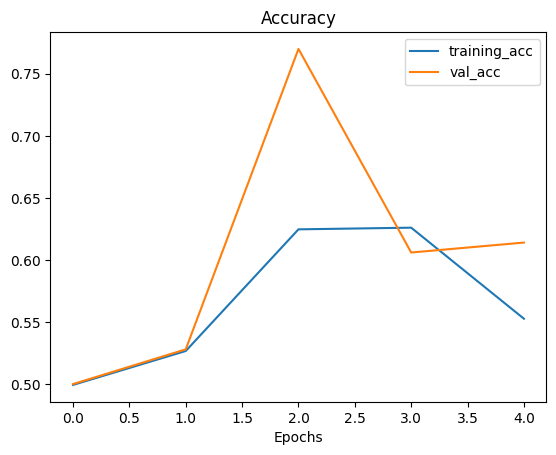

In [69]:
plot_loss_curves(history_6)

In [71]:
### build the same model - this time augmented and shuffled!!!!!
train_data_aug_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                             target_size =(224,224),
                                                             batch_size=32,
                                                             class_mode="binary",
                                                             shuffle=True #for demo
                                                             )
model_7 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_aug_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 460ms/step - loss: 0.6906 - accuracy: 0.5560 - val_loss: 0.6247 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 21s 437ms/step - loss: 0.5819 - accuracy: 0.6927 - val_loss: 0.3897 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 23s 488ms/step - loss: 0.5102 - accuracy: 0.7600 - val_loss: 0.4002 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 25s 531ms/step - loss: 0.4881 - accuracy: 0.7727 - val_loss: 0.4585 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 23s 486ms/step - loss: 0.4821 - accuracy: 0.7820 - val_loss: 0.4617 - val_accuracy: 0.7720


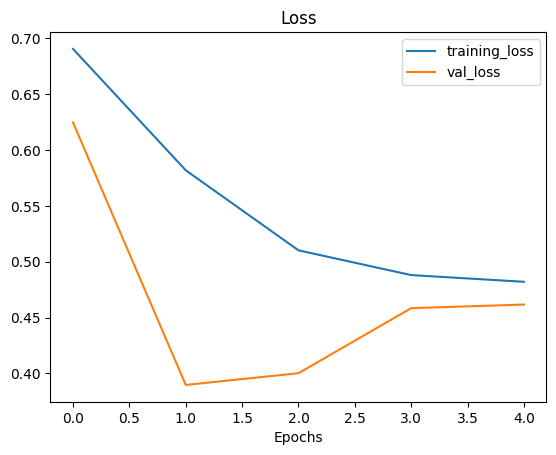

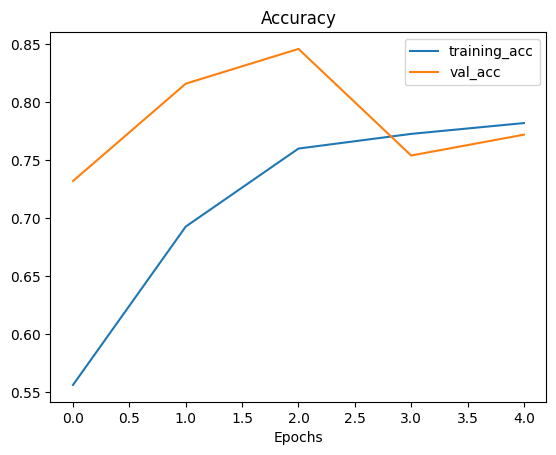

In [72]:
plot_loss_curves(history_7)

## Making prediction on custom data

In [73]:
print(class_names)

['pizza' 'steak']


In [74]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2024-05-18 22:44:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2024-05-18 22:44:06 (24.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [76]:
steak = mpimg.imread("03-steak.jpeg")

(-0.5, 3023.5, 4031.5, -0.5)

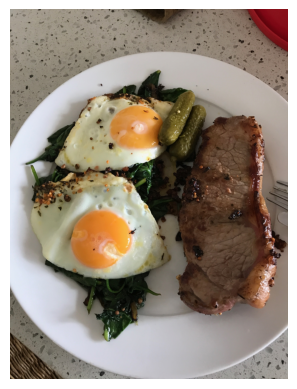

In [78]:
plt.imshow(steak)
plt.axis(False)

In [80]:
tf.expand_dims(steak,0) # we need 4 ndims inc batch_size

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 111],
         [142, 121, 100],
         [101,  80,  59],
         ...,
         [164, 155, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  96],
         [138, 118,  94],
         [106,  85,  64],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 126, 102],
         [148, 128, 103],
         [114,  

In [84]:
#create a func to import an image and reszie it for model
def load_prep_image(filename, img_shape=224):
  """
  Reads an image from filename and turns it into tensor and reshapes it

  """

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img


In [85]:
load_prep_image("03-steak.jpeg")

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [87]:
pred = model_7.predict(load_prep_image("03-steak.jpeg"))

1/1 [==============================] - 0s 32ms/step


In [90]:
#visualize models prediction and image
#we can index the predicted class rounding the pred proba and indexing on class_names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [95]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  impotts an imahe located at filename, preprocess it
  make a pred with model
  plot the image and pred
  """
  img = load_prep_image(filename)
  pred = model.predict(img)
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(tf.squeeze(img))
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 21ms/step


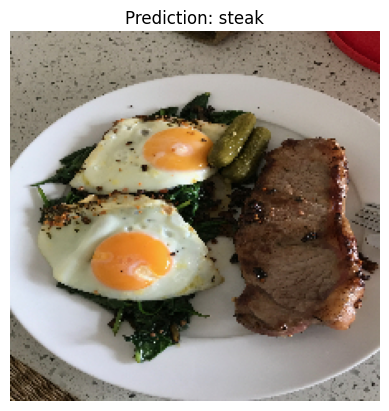

In [96]:
pred_and_plot(model_7, "03-steak.jpeg")

In [97]:
#another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2024-05-18 22:59:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2024-05-18 22:59:27 (32.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 27ms/step


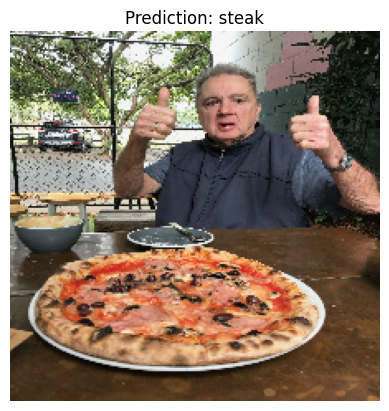

In [102]:
pred_and_plot(model_7, "03-pizza-dad.jpeg") #:(